In [1]:
import pandas as pd

movie_df = pd.read_csv('./data/ml-1m/movies.dat', names = ['movie_id', 'title', 'genre'], delimiter = '::')


<ipython-input-1-880d7887f814>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_df = pd.read_csv('./data/ml-1m/movies.dat', names = ['movie_id', 'title', 'genre'], delimiter = '::')


In [2]:
movie_df.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
# 전체 영화 개수 출력하기
len(movie_df['movie_id'].unique())

3883

In [5]:
print('total number of movie in data:' ,len(movie_df['movie_id'].unique()) )

total number of movie in data: 3883


In [6]:
movie_df['year'] = movie_df['title'].apply(lambda x: x[-5:-1])    # -5,-4,-3,-2

In [7]:
movie_df['title'] = movie_df['title'].apply(lambda x: x[:-7])

In [9]:
movie_df['title']

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: title, Length: 3883, dtype: object

In [9]:
movie_df.head()

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [10]:
year_counts = movie_df['year'].value_counts()[:10]

In [11]:
year_counts

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [12]:
for i, (year, count) in enumerate(year_counts.iteritems(), 1):
    print('TOP', i, ':', year,'(', count, ')')

TOP 1 : 1996 ( 345 )
TOP 2 : 1995 ( 342 )
TOP 3 : 1998 ( 337 )
TOP 4 : 1997 ( 315 )
TOP 5 : 1999 ( 283 )
TOP 6 : 1994 ( 257 )
TOP 7 : 1993 ( 165 )
TOP 8 : 2000 ( 156 )
TOP 9 : 1986 ( 104 )
TOP 10 : 1992 ( 102 )


In [13]:
movie_df['year'].apply(lambda x : x[:3] + '0')

0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: year, Length: 3883, dtype: object

In [14]:
movie_df['year'].apply(lambda x : x[:3] + '0s')

0       1990s
1       1990s
2       1990s
3       1990s
4       1990s
        ...  
3878    2000s
3879    2000s
3880    2000s
3881    2000s
3882    2000s
Name: year, Length: 3883, dtype: object

In [15]:
movie_df['years'] = movie_df['year'].apply(lambda x : x[:3] + '0s')

In [16]:
movie_df.head()

,movie_id,title,genre,year,years
0,1,Toy Story,Animation|Children's|Comedy,1995,1990s
1,2,Jumanji,Adventure|Children's|Fantasy,1995,1990s
2,3,Grumpier Old Men,Comedy|Romance,1995,1990s
3,4,Waiting to Exhale,Comedy|Drama,1995,1990s
4,5,Father of the Bride Part II,Comedy,1995,1990s


In [17]:
movie_df.tail()

,movie_id,title,genre,year,years
3878,3948,Meet the Parents,Comedy,2000,2000s
3879,3949,Requiem for a Dream,Drama,2000,2000s
3880,3950,Tigerland,Drama,2000,2000s
3881,3951,Two Family House,Drama,2000,2000s
3882,3952,"Contender, The",Drama|Thriller,2000,2000s


In [18]:
years_counts_data = movie_df['years'].value_counts().sort_index()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


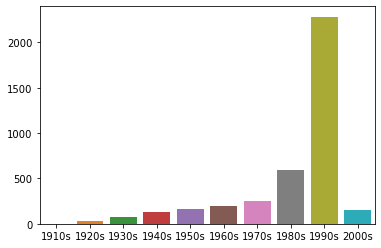

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(years_counts_data.index, years_counts_data.values)
plt.show()

In [20]:
# split 함수에서는 분할자를 지정해줄 수 있음(seperator)
"dog, cat, baby".split(',')

['dog', ' cat', ' baby']

In [21]:
"Adventure|Childrens|Fantasy".split('|')

['Adventure', 'Childrens', 'Fantasy']

In [22]:
# dictionary 자료형은 key와 value로 이루어져 있음
# 시리즈 객체일 때는 iteritems를 사용하지만 데이터 프레임 객체를 열람할 때는 iterrows()를 사용

genre_counts_dict = {}
for index, row in movie_df.iterrows():
    parsed_genre= row['genre'].split('|')
    for genre in parsed_genre:
        if genre in genre_counts_dict:
            genre_counts_dict[genre] += 1
        else:
            genre_counts_dict[genre] = 1
            
genre_counts_dict            

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

In [23]:
genre_counts_dict.keys()

dict_keys(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'])

In [24]:
genre_counts_dict.values()

dict_values([105, 251, 1200, 283, 68, 471, 1603, 503, 211, 492, 343, 276, 127, 143, 114, 106, 44, 68])

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

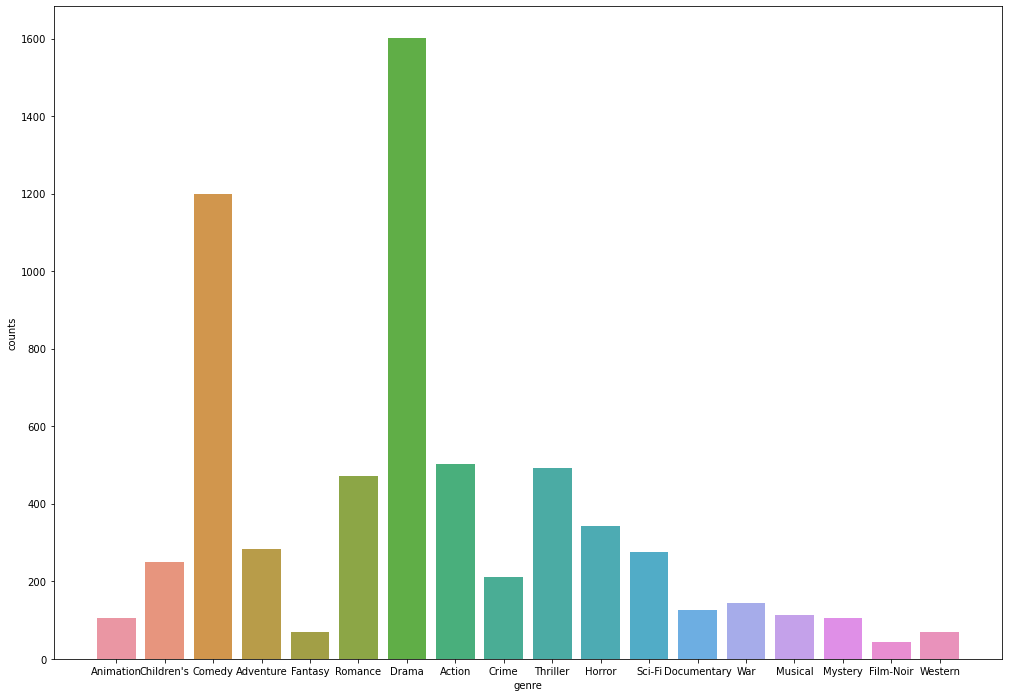

In [25]:
plt.rcParams['figure.figsize'] = (17,12)
sns.barplot(list(genre_counts_dict.keys()), list(genre_counts_dict.values()))
plt.xlabel('genre')
plt.ylabel('counts')
plt.plot()

In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

movie_df = pd.read_csv('./data/ml-1m/movies.dat', names = ['movie_id', 'title', 'genre'], delimiter = '::')
user_df = pd.read_csv('./data/ml-1m/users.dat', names = ['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter = '::')
rating_df = pd.read_csv('./data/ml-1m/ratings.dat', names = ['user_id', 'movie_id', 'rating', 'time'], delimiter = '::')



In [27]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [28]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [29]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [30]:
len(user_df['user_id'].unique())

6040

In [31]:
user_df.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [32]:
user_df['user_id'].nunique()

6040

In [33]:
gender_count = user_df['gender'].value_counts()

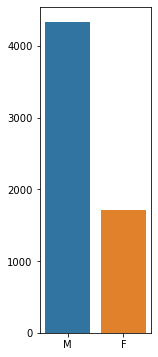

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (2,6))     # 기본 값은 (8,6)임
# plt.bar(gender_count.index, gender_count.values)
sns.barplot(gender_count.index, gender_count.values)

plt.show()

In [35]:
user_df['age_group'] = user_df['age'].apply(lambda x : x//10 * 10)
user_df.head()

,user_id,gender,age,occupation,zipcode,age_group
0,1,F,1,10,48067,0
1,2,M,56,16,70072,50
2,3,M,25,15,55117,20
3,4,M,45,7,02460,40
4,5,M,25,20,55455,20


In [36]:
age_count = user_df['age_group'].value_counts(sort=False)
# 인덱스 순으로 정렬                                            
age_count = age_count.sort_index()
age_count

0      222
10    1103
20    2096
30    1193
40     550
50     876
Name: age_group, dtype: int64

In [37]:
# age_count 객체 자체를 바꾸기 위해 inplace사용
age_count.rename(index = {0:'outlier'} ,inplace = True )
age_count

outlier     222
10         1103
20         2096
30         1193
40          550
50          876
Name: age_group, dtype: int64

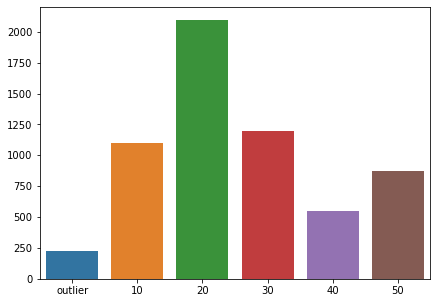

In [38]:
plt.figure(figsize = (7,5))     # 기본 값은 (8,6)임

sns.barplot(age_count.index, age_count.values)
plt.show()

In [39]:
rating_df.groupby('movie_id')['rating'].count()

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

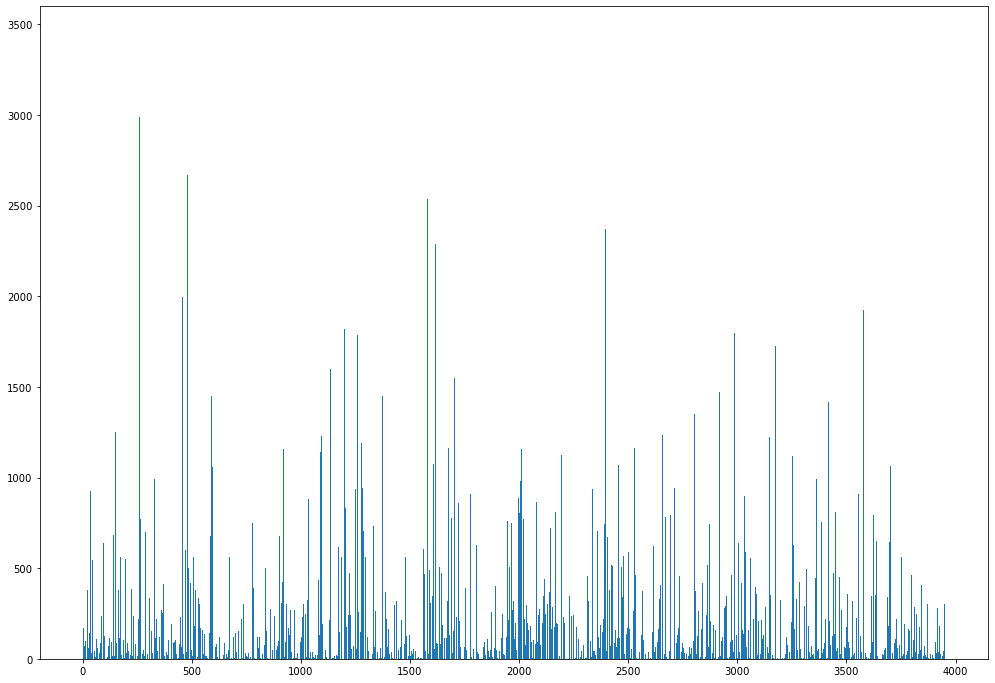

In [40]:
movie_rating_count = rating_df.groupby('movie_id')['rating'].count()
plt.bar(movie_rating_count.index, movie_rating_count.values)
plt.show()

In [41]:
movie_rating_count.idxmax()

2858

In [42]:
movie_rating_count.max()

3428

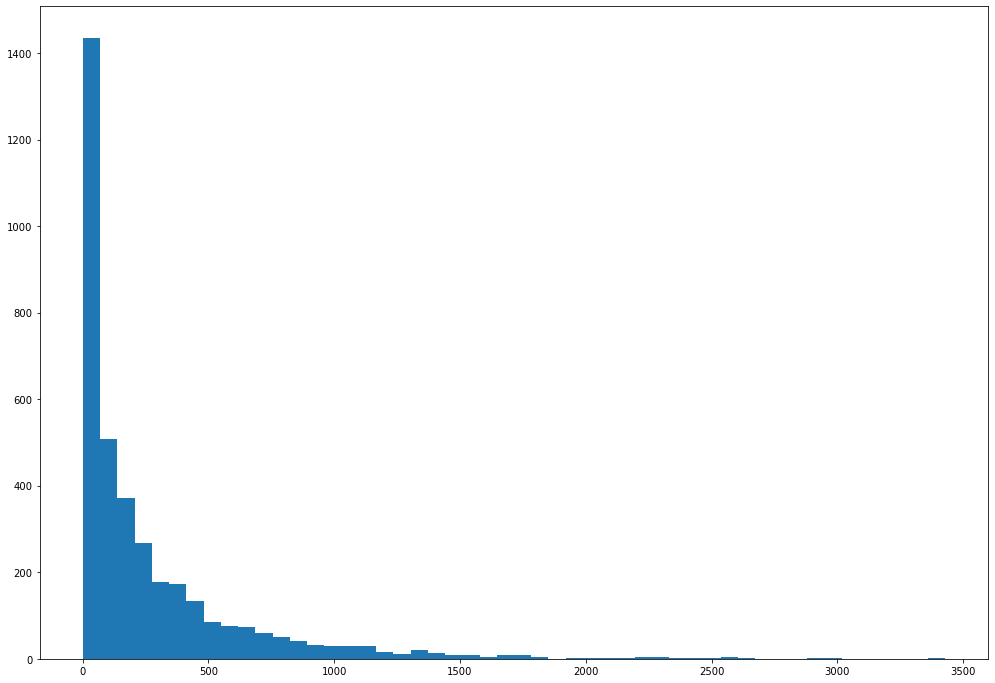

In [43]:
plt.hist(movie_rating_count.values, bins = 50)
plt.show()

In [44]:
movie_df['movie_id'].nunique()

3883

In [45]:
# 별점을 100개도 못받은 영화의 개수
movie_rating_count[movie_rating_count<100].size

1687

In [46]:
len(movie_rating_count[movie_rating_count<100])

1687

In [47]:
# 영화 별 평균 평점 탐색
movie_rating_mean = rating_df.groupby('movie_id')['rating'].mean()

movie_rating_mean.head(20)

movie_id
1     4.146846
2     3.201141
3     3.016736
4     2.729412
5     3.006757
6     3.878723
7     3.410480
8     3.014706
9     2.656863
10    3.540541
11    3.793804
12    2.362500
13    3.262626
14    3.542484
15    2.458904
16    3.793255
17    4.027545
18    3.337580
19    2.480720
20    2.537500
Name: rating, dtype: float64

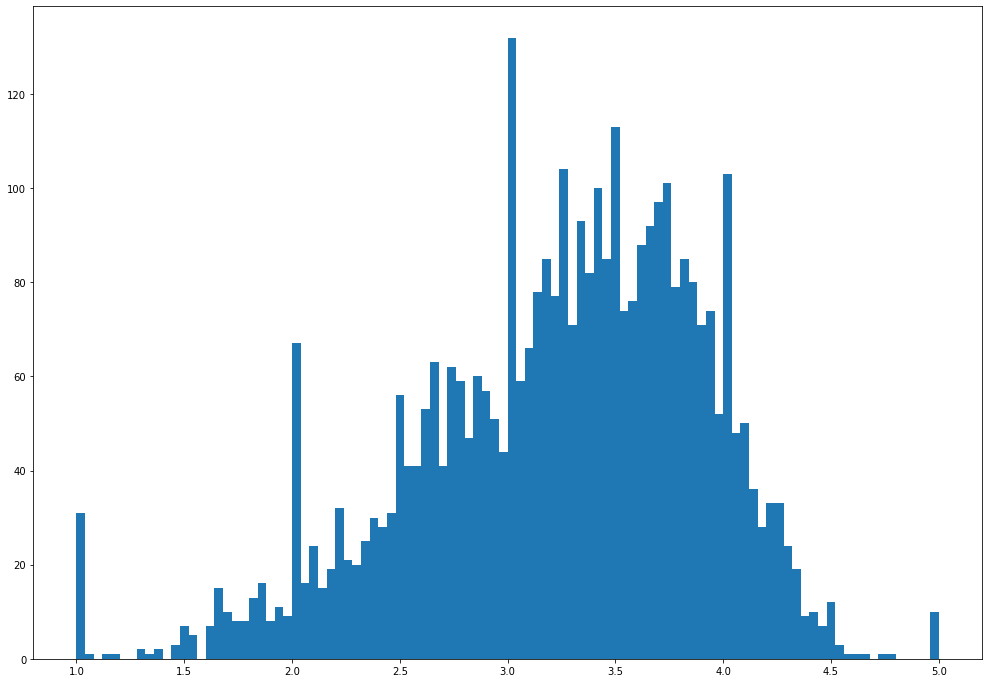

In [48]:
plt.hist(movie_rating_mean.values, bins = 100)
plt.show()

In [49]:
rating_df.describe()

,user_id,movie_id,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [50]:
movie_rating_info = rating_df.groupby('movie_id')['rating'].agg(['count', 'mean', 'std'])
movie_rating_info

,count,mean,std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086
...,...,...,...
3948,862,3.635731,1.014196
3949,304,4.115132,1.009804
3950,54,3.666667,1.046107


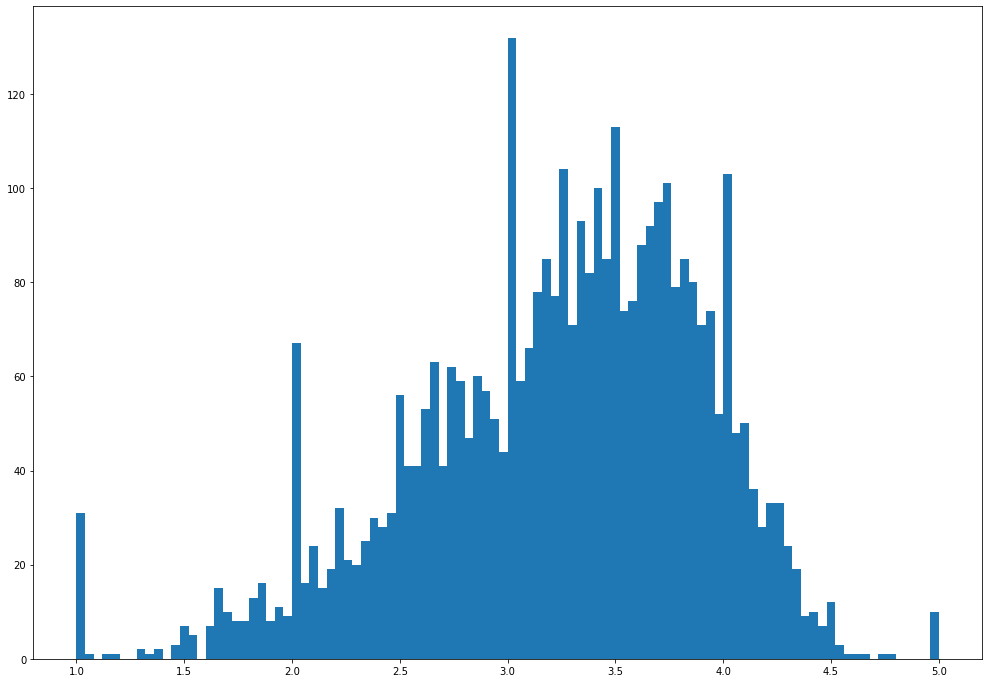

In [51]:
plt.hist(movie_rating_info['mean'], bins = 100)
plt.show()

In [52]:
movie_rating_info.rename(columns = lambda x : 'rating_' + x, inplace = True)

In [53]:
movie_rating_info.head()

,rating_count,rating_mean,rating_std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086


In [54]:
rating_df.groupby('user_id')['rating'].count()

user_id
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Name: rating, Length: 6040, dtype: int64

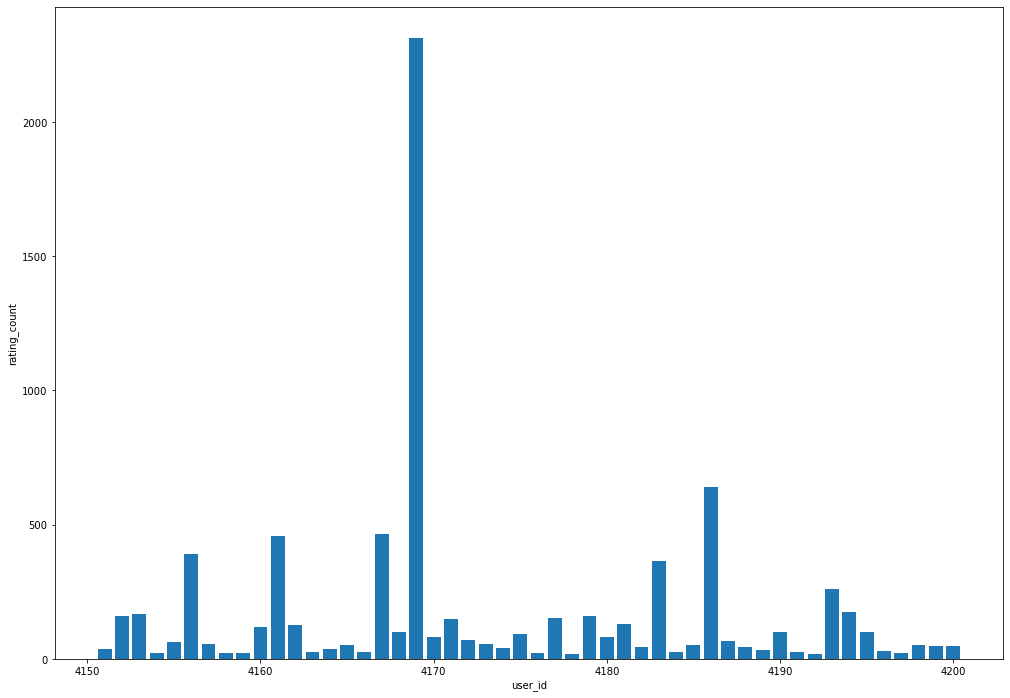

In [55]:
user_rating_count = rating_df.groupby('user_id')['rating'].count()

plt.bar(user_rating_count.index[4150:4200], user_rating_count.values[4150:4200])
plt.xlabel('user_id')
plt.ylabel('rating_count')
plt.show()

In [56]:
user_rating_count.sort_values(ascending = False)

user_id
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: rating, Length: 6040, dtype: int64

In [57]:
user_df[user_df['user_id']==4169]

,user_id,gender,age,occupation,zipcode,age_group
4168,4169,M,50,0,66048,50


In [58]:
top_user_id = user_rating_count.idxmax()
user_df[user_df['user_id'] == top_user_id]

,user_id,gender,age,occupation,zipcode,age_group
4168,4169,M,50,0,66048,50


In [59]:
movie_df[movie_df['movie_id']==2858]

,movie_id,title,genre
2789,2858,American Beauty (1999),Comedy|Drama


In [60]:
movie_rating_info.head()

,rating_count,rating_mean,rating_std
movie_id,,,
1,2077,4.146846,0.852349
2,701,3.201141,0.983172
3,478,3.016736,1.071712
4,170,2.729412,1.013381
5,296,3.006757,1.025086


In [61]:
movie_rating_info['rating_mean'].idxmax()

787

In [62]:
movie_df[movie_df['movie_id']==787]

,movie_id,title,genre
777,787,"Gate of Heavenly Peace, The (1995)",Documentary


In [63]:
movie_rating_info['rating_mean'].max()

5.0

In [64]:
movie_rating_info.loc[787]

rating_count    3.0
rating_mean     5.0
rating_std      0.0
Name: 787, dtype: float64

In [65]:
user_rating_info = rating_df.groupby('user_id')['rating'].agg(['mean', 'std'])
user_rating_info.rename(columns = {'mean' : 'rating_mean', 'std' : 'rating_std'}, inplace = True)
user_rating_info.head()

,rating_mean,rating_std
user_id,,
1,4.188679,0.680967
2,3.713178,1.001513
3,3.901961,0.984985
4,4.190476,1.077917
5,3.146465,1.132699


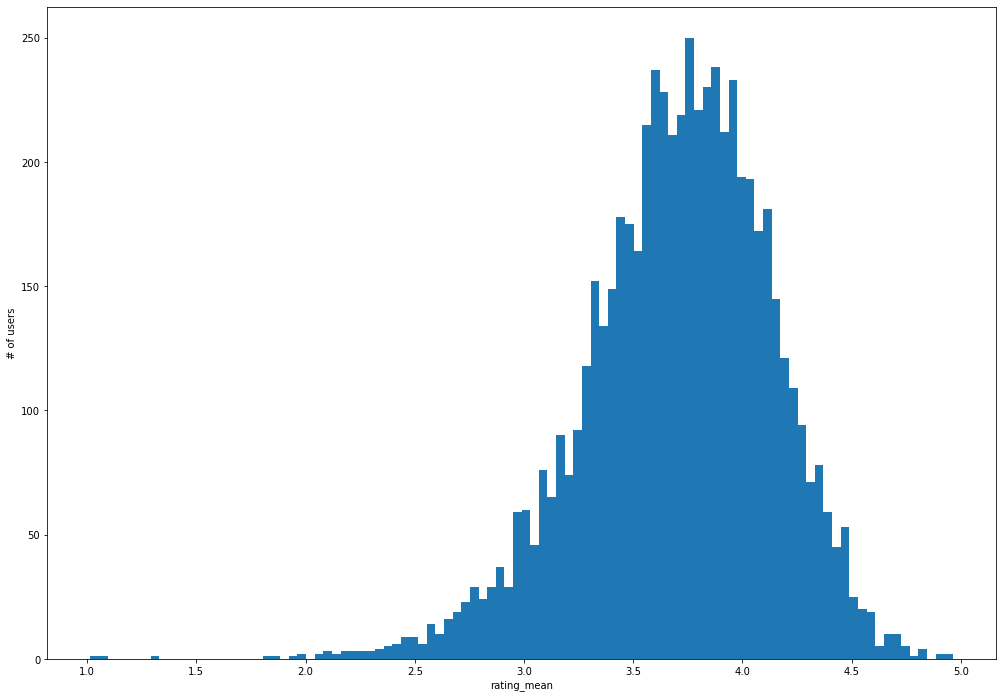

In [66]:
plt.hist(user_rating_info['rating_mean'].values, bins = 100)
plt.xlabel('rating_mean')
plt.ylabel('# of users')
plt.show()

In [67]:
rating_df.describe()

,user_id,movie_id,rating,time
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [68]:
user_rating_info

,rating_mean,rating_std
user_id,,
1,4.188679,0.680967
2,3.713178,1.001513
3,3.901961,0.984985
4,4.190476,1.077917
5,3.146465,1.132699
...,...,...
6036,3.302928,1.023684
6037,3.717822,0.877910
6038,3.800000,1.105013


In [69]:
# 사용자와 영화 간 평점 행렬 생성

rating_df[['user_id', 'movie_id', 'rating']].head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [70]:
rating_df[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id']).head(10)

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5
        1197           3
        1287           5
        2804           5
        594            4
        919            4

In [71]:
um_rating_df = rating_df[['user_id', 'movie_id', 'rating']].set_index(['user_id', 'movie_id'])
um_rating_df.head()

rating
user_id movie_id        
1       1193           5
        661            3
        914            3
        3408           4
        2355           5

In [72]:
um_rating_df.unstack(-1, 0)     # 뒤에 0은 fillvalue임

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1             5    0    0    0    0    0    0    0    0    0  ...    0    0   
2             0    0    0    0    0    0    0    0    0    0  ...    0    0   
3             0    0    0    0    0    0    0    0    0    0  ...    0    0   
4             0    0    0    0    0    0    0    0    0    0  ...    0    0   
5             0    0    0    0    0    2    0    0    0    0  ...    0    0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6036          0    0    0    2    0    3    0    0    0    0  ...    0    0   
6037          0    0    0    0    0    0    0    0    0    0  ...    0    0   
6038          0    0    0    0    0    0    0    0    0    0  ...    0    0   
6039          0    0    0    0    0    0    0    0    0    0  ...    0    0   
6040          3    0    0    0    0    0    0    0    0    0  ...    0    0   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1           0    0    0    0    0    0    0    0  
2           0    0    0    0    0    0    0    0  
3           0    0    0    0    0    0    0    0  
4           0    0    0    0    0    0    0    0  
5           0    0    0    0    0    0    0    0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
6036        0    0    0    0    0    0    0    0  
6037        0    0    0    0    0    0    0    0  
6038        0    0    0    0    0    0    0    0  
6039        0    0    0    0    0    0    0    0  
6040        0    0    0    0    0    0    0    0  

[6040 rows x 3706 columns]

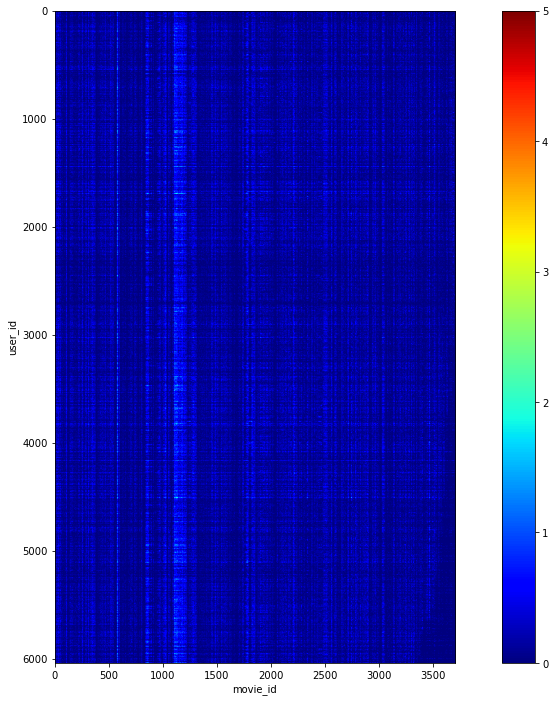

In [73]:
rating_table =um_rating_df.unstack(fill_value = 0)

plt.imshow(rating_table, cmap = 'jet')    # show image
plt.colorbar()
plt.xlabel('movie_id')
plt.ylabel('user_id')
plt.show()

# movie_len(3)

In [74]:
# 행렬의 대부분의 원소가 비어있는 행렬을 희소행렬이라고 함.
# sparse metrix (행렬 완성 : metrix completion)
# 직각행렬, 대각행렬 (대각행렬은 대가각선이외의 원소는 다 0)
# svd알고리즘에서 새로운 행렬 A'과 행렬 A의 값이 최대한 비슷해질 때까지 계속 이 전 과정을 반복하는 것은 이포크라고한다.

In [75]:
!pip install surprise

In [76]:
from surprise import Reader, Dataset

reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(rating_df[['user_id', 'movie_id', 'rating']], reader)
type(data)

surprise.dataset.DatasetAutoFolds

In [77]:
from surprise.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 42)

In [78]:
train_data

In [79]:
test_data

[(1841, 3717, 1.0),
 (3715, 880, 3.0),
 (2002, 3072, 4.0),
 (3332, 2734, 3.0),
 (3576, 631, 3.0),
 (2092, 3247, 3.0),
 (5283, 2643, 1.0),
 (4610, 2124, 3.0),
 (398, 3176, 4.0),
 (4533, 357, 4.0),
 (76, 2692, 5.0),
 (921, 1231, 4.0),
 (4473, 377, 4.0),
 (955, 383, 2.0),
 (4502, 1207, 4.0),
 (5744, 266, 4.0),
 (1675, 3840, 4.0),
 (1593, 2288, 3.0),
 (5166, 2024, 5.0),
 (1879, 1476, 3.0),
 (1932, 2054, 3.0),
 (2665, 3760, 4.0),
 (3547, 3816, 5.0),
 (713, 3751, 3.0),
 (1115, 2710, 3.0),
 (4231, 1246, 2.0),
 (1737, 1673, 4.0),
 (4058, 2617, 4.0),
 (3507, 2018, 4.0),
 (5471, 1210, 5.0),
 (2084, 377, 3.0),
 (3519, 2915, 3.0),
 (4488, 2118, 3.0),
 (2634, 3246, 4.0),
 (2116, 7, 3.0),
 (3988, 1126, 3.0),
 (2500, 303, 3.0),
 (3971, 2141, 4.0),
 (3825, 1333, 4.0),
 (5615, 1, 5.0),
 (4590, 457, 3.0),
 (893, 3858, 3.0),
 (1169, 2717, 5.0),
 (413, 2313, 4.0),
 (462, 2005, 4.0),
 (2264, 2490, 4.0),
 (863, 3702, 3.0),
 (2140, 3167, 3.0),
 (202, 2087, 3.0),
 (2051, 318, 5.0),
 (4675, 2572, 5.0),
 (979, 

In [80]:
test_data_df = pd.DataFrame(test_data, columns = ['user_id', 'movie_id', 'rating'])

In [81]:
test_data_df

,user_id,movie_id,rating
0,1841,3717,1.0
1,3715,880,3.0
2,2002,3072,4.0
3,3332,2734,3.0
4,3576,631,3.0
...,...,...,...
200037,1586,1077,5.0
200038,2129,2700,5.0
200039,854,3102,3.0
200040,4033,3479,5.0


In [82]:
test_data_df[:10]

,user_id,movie_id,rating
0,1841,3717,1.0
1,3715,880,3.0
2,2002,3072,4.0
3,3332,2734,3.0
4,3576,631,3.0
5,2092,3247,3.0
6,5283,2643,1.0
7,4610,2124,3.0
8,398,3176,4.0
9,4533,357,4.0


In [83]:
# svd 모델 훈련

from surprise import SVD

model = SVD(random_state = 42)
model.fit(train_data)

In [84]:
test_user_id = 4
test_user_rating_df = rating_df[rating_df['user_id'] == test_user_id]   # 불린 인덱싱
test_user_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 233 to 253
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   21 non-null     int64
 1   movie_id  21 non-null     int64
 2   rating    21 non-null     int64
 3   time      21 non-null     int64
dtypes: int64(4)
memory usage: 840.0 bytes


In [85]:
test_user_rating_df.head()

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [86]:
test_user_rating_dict = {}

for _, row in test_user_rating_df.iterrows():
    movie_id = row['movie_id']
    rating = row['rating']
    test_user_rating_dict[movie_id] = rating
    
test_user_rating_dict

{3468: 5,
 1210: 3,
 2951: 4,
 1214: 4,
 1036: 4,
 260: 5,
 2028: 5,
 480: 4,
 1196: 2,
 1198: 5,
 1954: 5,
 1097: 4,
 3418: 4,
 3702: 4,
 2366: 4,
 1387: 5,
 3527: 1,
 1201: 5,
 2692: 5,
 2947: 5,
 1240: 5}

In [87]:
test_user_unrated_movies = []

for _, row in movie_df.iterrows():
    movie_id = row['movie_id']
    rating = 0
    if movie_id in test_user_rating_dict:
        continue
    test_user_unrated_movies.append((test_user_id, movie_id, rating))

test_user_unrated_movies[:10]

[(4, 1, 0),
 (4, 2, 0),
 (4, 3, 0),
 (4, 4, 0),
 (4, 5, 0),
 (4, 6, 0),
 (4, 7, 0),
 (4, 8, 0),
 (4, 9, 0),
 (4, 10, 0)]

In [88]:
test_user_prediction = model.test(test_user_unrated_movies)
test_user_prediction[:5]

[Prediction(uid=4, iid=1, r_ui=0, est=4.096887277437939, details={'was_impossible': False}),
 Prediction(uid=4, iid=2, r_ui=0, est=3.4117297281452403, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=3.193000768349389, details={'was_impossible': False}),
 Prediction(uid=4, iid=4, r_ui=0, est=3.0017806494686354, details={'was_impossible': False}),
 Prediction(uid=4, iid=5, r_ui=0, est=3.108423452883594, details={'was_impossible': False})]

In [89]:
test_user_predicted_rating_dict = {}

for _, movie_id, _, predicted_rating, _ in test_user_prediction:
    test_user_predicted_rating_dict[movie_id] = predicted_rating

In [90]:
test_user_predicted_rating_dict

{1: 4.096887277437939,
 2: 3.4117297281452403,
 3: 3.193000768349389,
 4: 3.0017806494686354,
 5: 3.108423452883594,
 6: 3.829756740451222,
 7: 3.206699420353713,
 8: 3.4965446175420065,
 9: 2.8686514963120393,
 10: 3.739056635667237,
 11: 3.837128633294278,
 12: 2.731942402735499,
 13: 3.515919231501918,
 14: 3.8334068929712872,
 15: 2.878362389743807,
 16: 3.981371258848737,
 17: 4.174908336029549,
 18: 3.574470005295118,
 19: 2.59161864232805,
 20: 2.6870334712373656,
 21: 3.810939416645211,
 22: 3.5621442793529865,
 23: 3.132651988790237,
 24: 3.2636489568046945,
 25: 3.7326398704426658,
 26: 3.9125833248302526,
 27: 3.3281996132798635,
 28: 4.299193723685695,
 29: 3.794917875469919,
 30: 4.002020628880339,
 31: 3.1660178646535466,
 32: 4.058061875776347,
 33: 3.4883584147484985,
 34: 3.86111233096767,
 35: 3.5414734560063152,
 36: 4.1940043809530225,
 37: 3.865861157681738,
 38: 3.1020955610773515,
 39: 3.7192635586232745,
 40: 3.905340028537711,
 41: 3.9045812969098406,
 42: 3.11

In [91]:
import operator

# tuple 형태로 출력됨
# test_user_predicted_rating_dict.items()
sorted(test_user_predicted_rating_dict.items(), key = operator.itemgetter(1))

[(3593, 1.6911374599641988),
 (810, 1.7162493366386367),
 (1323, 1.7325081141119858),
 (1495, 1.7492150989886348),
 (3945, 1.7611168663388477),
 (2799, 1.7726813897165625),
 (1826, 1.775058015170949),
 (3799, 1.7871736938475462),
 (181, 1.8420196019852582),
 (2515, 1.87097918791905),
 (66, 1.9112500104408836),
 (2383, 1.916640923062549),
 (2974, 1.939743826961499),
 (3664, 1.941381295531237),
 (1739, 1.9465695650216122),
 (2368, 1.952871340879158),
 (3042, 1.9773157774326569),
 (1599, 1.9864744430124128),
 (3268, 2.003960400012712),
 (3041, 2.004489312117897),
 (2555, 2.021088803793908),
 (1707, 2.0218972492346823),
 (2798, 2.0326196471258995),
 (102, 2.0440852929132323),
 (3572, 2.044541391540783),
 (2817, 2.0453934309943413),
 (2818, 2.0499932412662196),
 (1731, 2.0503486825716988),
 (3043, 2.057297384746299),
 (2449, 2.065516088989013),
 (1595, 2.0681332666278065),
 (1556, 2.0774392679417786),
 (1998, 2.082129727270566),
 (3564, 2.0861219103515887),
 (2382, 2.0926140266394224),
 (13

In [92]:
sorted(test_user_predicted_rating_dict.items(), key = operator.itemgetter(1), reverse = True)

[(3030, 4.751372999527201),
 (1233, 4.7211581307991946),
 (2905, 4.687629136999501),
 (2019, 4.605141906559054),
 (527, 4.5828300055997255),
 (1148, 4.570964641634933),
 (1272, 4.564766144798199),
 (858, 4.564667981750939),
 (3022, 4.551193867960311),
 (750, 4.550763814390601),
 (668, 4.539792861125004),
 (1178, 4.537104395399391),
 (1204, 4.516192808406723),
 (50, 4.5151439963229745),
 (2357, 4.514232270340447),
 (1237, 4.512759375724726),
 (1283, 4.511279011778773),
 (608, 4.50887264314623),
 (318, 4.507492434310956),
 (3421, 4.502271241621578),
 (1945, 4.492583285012052),
 (1252, 4.490989448707178),
 (1221, 4.488881273419094),
 (3222, 4.487088318660028),
 (720, 4.481594123986327),
 (1136, 4.477808022315044),
 (1193, 4.472650941568144),
 (3634, 4.470216367566021),
 (1262, 4.467668145305378),
 (3429, 4.461038786099885),
 (593, 4.457427624050082),
 (745, 4.45195874345894),
 (3435, 4.44227989003416),
 (924, 4.429198192773215),
 (3338, 4.4257945128339955),
 (1207, 4.422088747457222),
 (2

In [93]:
test_user_predicted_rating = sorted(test_user_predicted_rating_dict.items(), key = operator.itemgetter(1), reverse = True)

In [94]:
movie_dict = {}
for _, row in movie_df.iterrows():
    movie_id = row['movie_id']
    movie_dict[movie_id] = row['title']
    
movie_dict    

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (1995)',
 33: 'Wings of Courage (1995)',
 34: 'Babe (1

In [95]:
for pred in test_user_predicted_rating[:10]:
    movie_id = pred[0]
    predicted_rating = pred[1]
    print(f'{movie_dict[movie_id]} : {predicted_rating:.2f}')

Yojimbo (1961) : 4.75
Boat, The (Das Boot) (1981) : 4.72
Sanjuro (1962) : 4.69
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) : 4.61
Schindler's List (1993) : 4.58
Wrong Trousers, The (1993) : 4.57
Patton (1970) : 4.56
Godfather, The (1972) : 4.56
General, The (1927) : 4.55
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) : 4.55


In [96]:
# 평점 예측 모델 평가
# 실제 평점과 예측 평점의 비교

In [97]:
test_data[:10]

[(1841, 3717, 1.0),
 (3715, 880, 3.0),
 (2002, 3072, 4.0),
 (3332, 2734, 3.0),
 (3576, 631, 3.0),
 (2092, 3247, 3.0),
 (5283, 2643, 1.0),
 (4610, 2124, 3.0),
 (398, 3176, 4.0),
 (4533, 357, 4.0)]

In [98]:
test_result = model.test(test_data)
test_result[:10]

[Prediction(uid=1841, iid=3717, r_ui=1.0, est=2.2449976403111234, details={'was_impossible': False}),
 Prediction(uid=3715, iid=880, r_ui=3.0, est=2.340964161579904, details={'was_impossible': False}),
 Prediction(uid=2002, iid=3072, r_ui=4.0, est=4.162753727349445, details={'was_impossible': False}),
 Prediction(uid=3332, iid=2734, r_ui=3.0, est=3.5813623831381483, details={'was_impossible': False}),
 Prediction(uid=3576, iid=631, r_ui=3.0, est=2.3643331344773646, details={'was_impossible': False}),
 Prediction(uid=2092, iid=3247, r_ui=3.0, est=2.702171790184663, details={'was_impossible': False}),
 Prediction(uid=5283, iid=2643, r_ui=1.0, est=1.7091139295425253, details={'was_impossible': False}),
 Prediction(uid=4610, iid=2124, r_ui=3.0, est=3.3688371239937855, details={'was_impossible': False}),
 Prediction(uid=398, iid=3176, r_ui=4.0, est=3.692115092361899, details={'was_impossible': False}),
 Prediction(uid=4533, iid=357, r_ui=4.0, est=3.526258341138435, details={'was_impossible'

In [99]:
# rmse는 오류지표이기 때문에 작을 수록 좋다.
from surprise import accuracy

accuracy.rmse(test_result)

RMSE: 0.8729


0.8728931555711223

In [100]:
# 하이퍼파라미터 튜닝

rmse_ =[]

for n_factors in range(10,101,10):
    model = SVD(n_factors = n_factors, random_state = 42)
    model.fit(train_data)
    rmse_.append(accuracy.rmse(model.test(test_data)))

RMSE: 0.8738
RMSE: 0.8731
RMSE: 0.8698
RMSE: 0.8714
RMSE: 0.8706
RMSE: 0.8715
RMSE: 0.8721
RMSE: 0.8729
RMSE: 0.8724
RMSE: 0.8729


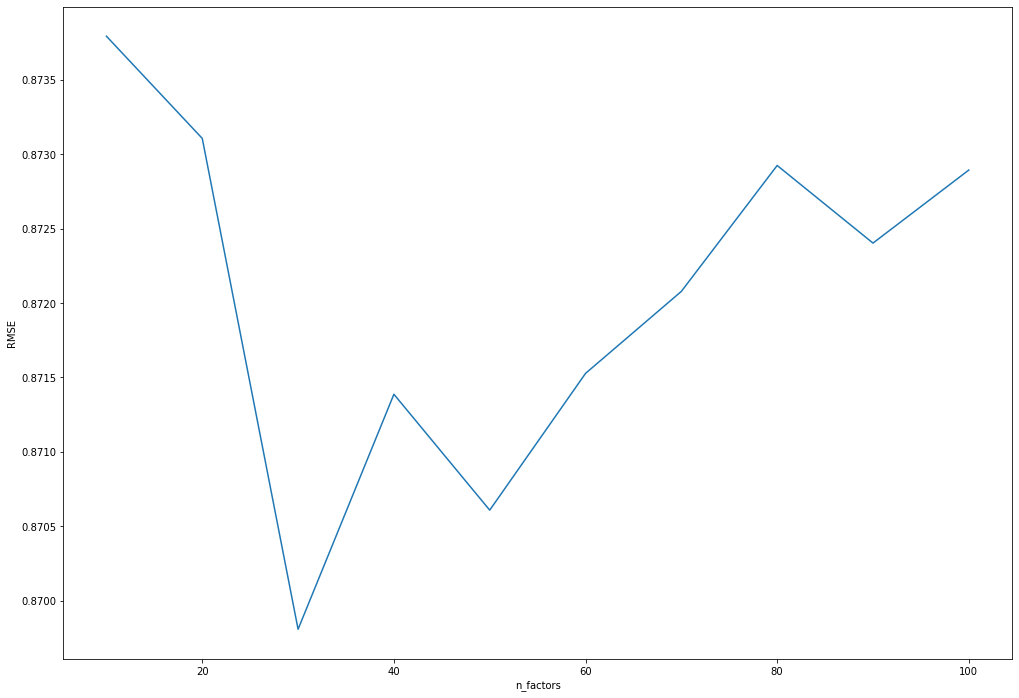

In [101]:
plt.plot(range(10,101,10), rmse_)
plt.xlabel('n_factors')
plt.ylabel('RMSE')
plt.show()

In [102]:
model = SVD(n_factors = 30, random_state = 42)
model.fit(train_data)

In [103]:
test_user_rated_movies = []

for movie_id, rating in test_user_rating_dict.items():
    test_user_rated_movies.append((test_user_id, movie_id, rating))
    
test_user_rated_movies 
                                  

[(4, 3468, 5),
 (4, 1210, 3),
 (4, 2951, 4),
 (4, 1214, 4),
 (4, 1036, 4),
 (4, 260, 5),
 (4, 2028, 5),
 (4, 480, 4),
 (4, 1196, 2),
 (4, 1198, 5),
 (4, 1954, 5),
 (4, 1097, 4),
 (4, 3418, 4),
 (4, 3702, 4),
 (4, 2366, 4),
 (4, 1387, 5),
 (4, 3527, 1),
 (4, 1201, 5),
 (4, 2692, 5),
 (4, 2947, 5),
 (4, 1240, 5)]

In [104]:
test_user_rated_movies_predictions = model.test(test_user_rated_movies)
test_user_rated_movies_predictions

[Prediction(uid=4, iid=3468, r_ui=5, est=4.270260383139873, details={'was_impossible': False}),
 Prediction(uid=4, iid=1210, r_ui=3, est=3.7815284793214095, details={'was_impossible': False}),
 Prediction(uid=4, iid=2951, r_ui=4, est=4.175289745100643, details={'was_impossible': False}),
 Prediction(uid=4, iid=1214, r_ui=4, est=3.9600663068557527, details={'was_impossible': False}),
 Prediction(uid=4, iid=1036, r_ui=4, est=4.0214597523172495, details={'was_impossible': False}),
 Prediction(uid=4, iid=260, r_ui=5, est=4.336822206272891, details={'was_impossible': False}),
 Prediction(uid=4, iid=2028, r_ui=5, est=4.477084919658798, details={'was_impossible': False}),
 Prediction(uid=4, iid=480, r_ui=4, est=3.4636263670175427, details={'was_impossible': False}),
 Prediction(uid=4, iid=1196, r_ui=2, est=4.075416276357451, details={'was_impossible': False}),
 Prediction(uid=4, iid=1198, r_ui=5, est=4.282602372899128, details={'was_impossible': False}),
 Prediction(uid=4, iid=1954, r_ui=5, e

In [105]:
# 실제 평점과 예측한 평점 비교하기

movie_ids = []
true_ratings = []
pred_ratings = []

for _, movie_id, true_rating, pred_rating, _ in test_user_rated_movies_predictions:
    title = movie_dict[movie_id]
    movie_ids.append(movie_id)
    true_ratings.append(true_rating)
    pred_ratings.append(pred_rating)
    print(f'{title} : {true_rating:2f} / {pred_rating:2f}')

Hustler, The (1961) : 5.000000 / 4.270260
Star Wars: Episode VI - Return of the Jedi (1983) : 3.000000 / 3.781528
Fistful of Dollars, A (1964) : 4.000000 / 4.175290
Alien (1979) : 4.000000 / 3.960066
Die Hard (1988) : 4.000000 / 4.021460
Star Wars: Episode IV - A New Hope (1977) : 5.000000 / 4.336822
Saving Private Ryan (1998) : 5.000000 / 4.477085
Jurassic Park (1993) : 4.000000 / 3.463626
Star Wars: Episode V - The Empire Strikes Back (1980) : 2.000000 / 4.075416
Raiders of the Lost Ark (1981) : 5.000000 / 4.282602
Rocky (1976) : 5.000000 / 3.858522
E.T. the Extra-Terrestrial (1982) : 4.000000 / 3.871574
Thelma & Louise (1991) : 4.000000 / 3.897179
Mad Max (1979) : 4.000000 / 3.682237
King Kong (1933) : 4.000000 / 3.797124
Jaws (1975) : 5.000000 / 4.200017
Predator (1987) : 1.000000 / 3.453213
Good, The Bad and The Ugly, The (1966) : 5.000000 / 4.301168
Run Lola Run (Lola rennt) (1998) : 5.000000 / 4.008489
Goldfinger (1964) : 5.000000 / 3.983422
Terminator, The (1984) : 5.000000 / 3

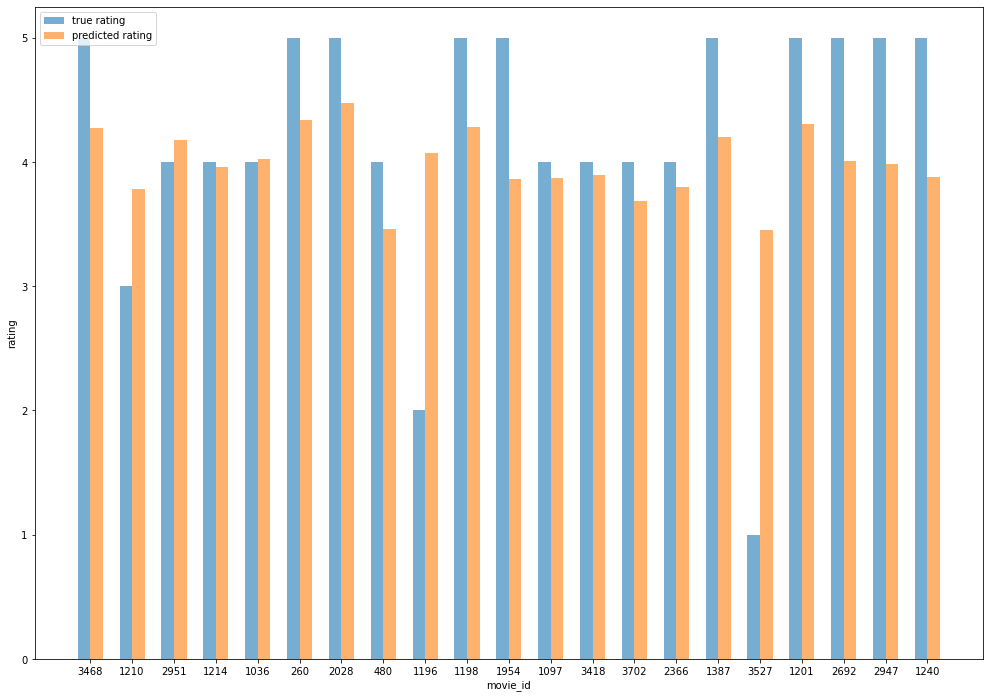

In [114]:
import numpy as np

index = np.arange(len(movie_ids))

plt.bar(index - 0.15,true_ratings, width = 0.3, alpha = 0.6, label = 'true rating')
plt.bar(index + 0.15, pred_ratings, width = 0.3, alpha = 0.6, label = 'predicted rating')
plt.xlabel('movie_id')
plt.ylabel('rating')
plt.xticks(index, movie_ids)
plt.legend()
plt.show()